<a href="https://colab.research.google.com/github/BennettLovejoy/Portfolio/blob/main/Columbus_City_School_Demographics_Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from functools import reduce

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
CCSD_Schools = pd.read_excel('/content/drive/MyDrive/Columbus City Schools/Take 2/NCES Dataset/CCSD Data Cleaned .xlsx')

In [4]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import numpy as np

In [5]:
Neighborhood_Poverty = pd.read_excel('/content/drive/MyDrive/Columbus City Schools/Take 2/NCES Dataset/Neighborhood Poverty Data Cleaned .xlsx')
Neighborhood_Poverty.head()

,NCESSCH,NAME,IPR_EST,IPR_SE
0,10000500870,Albertville Middle School,259,87.0
1,10000500871,Albertville High School,261,92.0
2,10000500879,Albertville Intermediate School,139,61.0
3,10000500889,Albertville Elementary School,227,110.0
4,10000501616,Albertville Kindergarten and PreK,373,124.0


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# List all available styles
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<ipython-input-7-249dcfa8fc2c>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


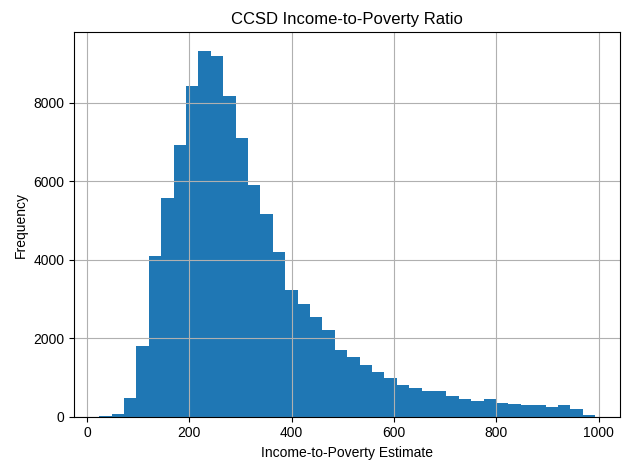

In [7]:
Neighborhood_Poverty['IPR_EST'].hist(bins=40)
ax = plt.gca()
ax.set_title('CCSD Income-to-Poverty Ratio')
ax.set_xlabel('Income-to-Poverty Estimate')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.style.use('seaborn-whitegrid')
plt.show()
ax.figure.savefig('Income-to-Poverty.png')

In [8]:
from shapely.geometry import Point
city_boundary = gpd.read_file('/content/drive/MyDrive/Columbus City Schools/Take 2/Corporate_Boundary.geojson')

In [9]:
schools_gdf = gpd.GeoDataFrame(
    CCSD_Schools,
    geometry=gpd.points_from_xy(CCSD_Schools['Longitude [Public School] 2022-23'], CCSD_Schools['Latitude [Public School] 2022-23'])
)

In [10]:
schools_gdf.set_crs(city_boundary.crs, inplace=True)

,School Name,School Name [Public School] 2022-23,School ID - NCES Assigned [Public School] Latest available year,Agency Name [Public School] 2022-23,Agency ID - NCES Assigned [Public School] Latest available year,County Name [Public School] 2022-23,County Number [Public School] 2022-23,ANSI/FIPS State Code [Public School] Latest available year,Location Address 1 [Public School] 2022-23,School Type [Public School] 2022-23,...,Asian or Asian/Pacific Islander Students [Public School] 2022-23,Hispanic Students [Public School] 2022-23,Black or African American Students [Public School] 2022-23,White Students [Public School] 2022-23,Nat. Hawaiian or Other Pacific Isl. Students [Public School] 2022-23,Two or More Races Students [Public School] 2022-23,Total Race/Ethnicity [Public School] 2022-23,Full-Time Equivalent (FTE) Teachers [Public School] 2022-23,Pupil/Teacher Ratio [Public School] 2022-23,geometry
0,ALPINE ELEMENTARY SCHOOL,Alpine Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,1590 Alpine Dr,1-Regular school,...,9.0,28.0,179.0,60.0,2.0,29.0,307.0,17.0,18.06,POINT (-82.97400 40.09440)
1,ARTS IMPACT MIDDLE SCHOOL (AIMS),Arts Impact Middle School (Aims),3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,680 Jack Gibbs Blvd,1-Regular school,...,1.0,49.0,376.0,55.0,0.0,51.0,532.0,33.0,16.12,POINT (-83.00790 39.98580)
2,AVALON ELEMENTARY SCHOOL,Avalon Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,5220 Avalon Ave,1-Regular school,...,28.0,92.0,208.0,26.0,0.0,20.0,375.0,20.0,18.75,POINT (-82.95530 40.07610)
3,AVONDALE ELEMENTARY SCHOOL,Avondale Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,141 Hawkes Ave,1-Regular school,...,3.0,22.0,85.0,98.0,0.0,32.0,240.0,16.0,15,POINT (-83.02580 39.95630)
4,BEATTY PARK ELEMENTARY SCHOOL,Beatty Park Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,519 Trevitt St,2-Special education school,...,0.0,4.0,30.0,8.0,0.0,5.0,47.0,10.0,4.7,POINT (-82.97150 39.97641)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,"Data Source: U.S. Department of Education, Nat...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY
122,† indicates that the data are not applicable.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY
123,– indicates that the data are missing.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT EMPTY


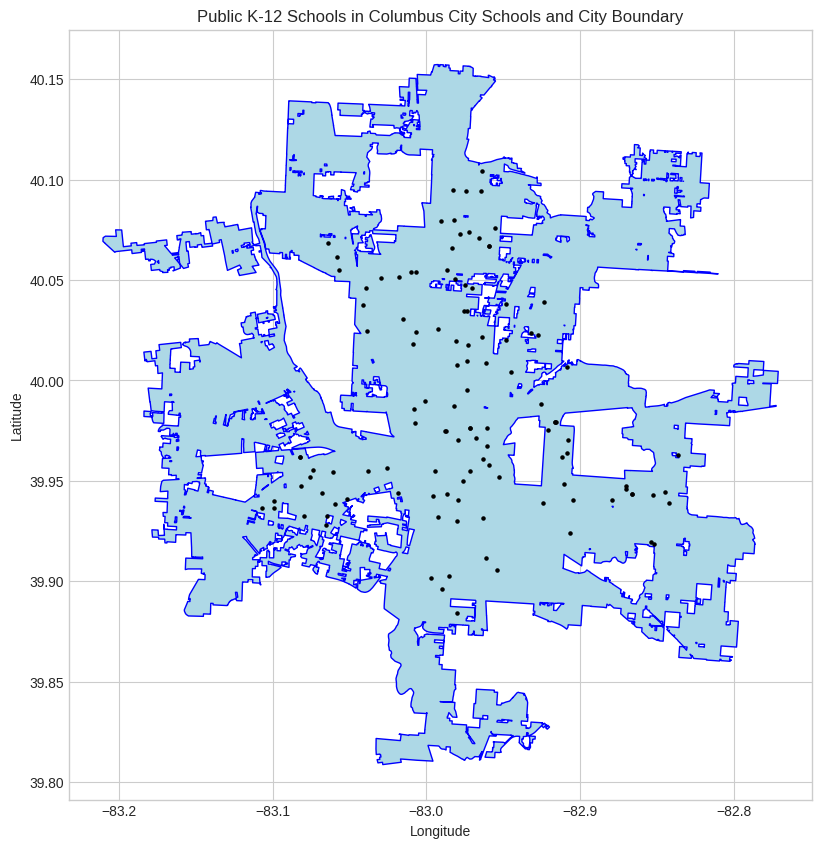

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
city_boundary.plot(ax=ax, color='lightblue', edgecolor='blue')
schools_gdf.plot(ax=ax, color='black', markersize=5)

plt.title('Public K-12 Schools in Columbus City Schools and City Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

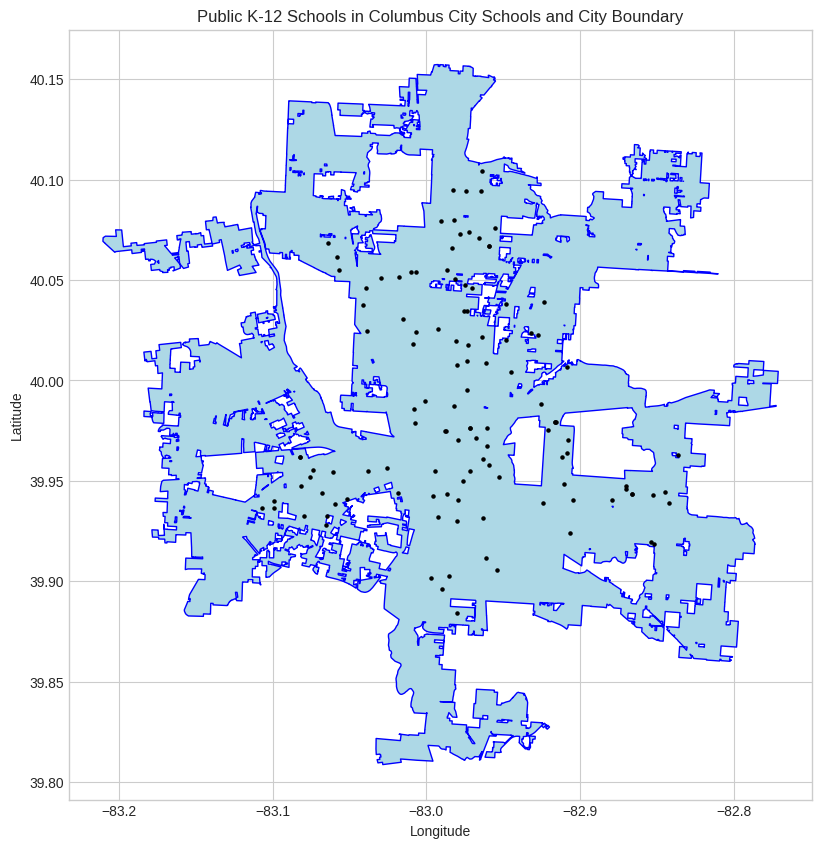

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
city_boundary.plot(ax=ax, color='lightblue', edgecolor='blue')
schools_gdf.plot(ax=ax, color='black', markersize=5)

plt.title('Public K-12 Schools in Columbus City Schools and City Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## 06-20-2024

In [13]:
CCSD_Schools.head()

,School Name,School Name [Public School] 2022-23,School ID - NCES Assigned [Public School] Latest available year,Agency Name [Public School] 2022-23,Agency ID - NCES Assigned [Public School] Latest available year,County Name [Public School] 2022-23,County Number [Public School] 2022-23,ANSI/FIPS State Code [Public School] Latest available year,Location Address 1 [Public School] 2022-23,School Type [Public School] 2022-23,...,American Indian/Alaska Native Students [Public School] 2022-23,Asian or Asian/Pacific Islander Students [Public School] 2022-23,Hispanic Students [Public School] 2022-23,Black or African American Students [Public School] 2022-23,White Students [Public School] 2022-23,Nat. Hawaiian or Other Pacific Isl. Students [Public School] 2022-23,Two or More Races Students [Public School] 2022-23,Total Race/Ethnicity [Public School] 2022-23,Full-Time Equivalent (FTE) Teachers [Public School] 2022-23,Pupil/Teacher Ratio [Public School] 2022-23
0,ALPINE ELEMENTARY SCHOOL,Alpine Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,1590 Alpine Dr,1-Regular school,...,0.0,9.0,28.0,179.0,60.0,2.0,29.0,307.0,17.0,18.06
1,ARTS IMPACT MIDDLE SCHOOL (AIMS),Arts Impact Middle School (Aims),3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,680 Jack Gibbs Blvd,1-Regular school,...,0.0,1.0,49.0,376.0,55.0,0.0,51.0,532.0,33.0,16.12
2,AVALON ELEMENTARY SCHOOL,Avalon Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,5220 Avalon Ave,1-Regular school,...,1.0,28.0,92.0,208.0,26.0,0.0,20.0,375.0,20.0,18.75
3,AVONDALE ELEMENTARY SCHOOL,Avondale Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,141 Hawkes Ave,1-Regular school,...,0.0,3.0,22.0,85.0,98.0,0.0,32.0,240.0,16.0,15
4,BEATTY PARK ELEMENTARY SCHOOL,Beatty Park Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,519 Trevitt St,2-Special education school,...,0.0,0.0,4.0,30.0,8.0,0.0,5.0,47.0,10.0,4.7


## 06-21-24

In [14]:
CCSD_Schools.head()

,School Name,School Name [Public School] 2022-23,School ID - NCES Assigned [Public School] Latest available year,Agency Name [Public School] 2022-23,Agency ID - NCES Assigned [Public School] Latest available year,County Name [Public School] 2022-23,County Number [Public School] 2022-23,ANSI/FIPS State Code [Public School] Latest available year,Location Address 1 [Public School] 2022-23,School Type [Public School] 2022-23,...,American Indian/Alaska Native Students [Public School] 2022-23,Asian or Asian/Pacific Islander Students [Public School] 2022-23,Hispanic Students [Public School] 2022-23,Black or African American Students [Public School] 2022-23,White Students [Public School] 2022-23,Nat. Hawaiian or Other Pacific Isl. Students [Public School] 2022-23,Two or More Races Students [Public School] 2022-23,Total Race/Ethnicity [Public School] 2022-23,Full-Time Equivalent (FTE) Teachers [Public School] 2022-23,Pupil/Teacher Ratio [Public School] 2022-23
0,ALPINE ELEMENTARY SCHOOL,Alpine Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,1590 Alpine Dr,1-Regular school,...,0.0,9.0,28.0,179.0,60.0,2.0,29.0,307.0,17.0,18.06
1,ARTS IMPACT MIDDLE SCHOOL (AIMS),Arts Impact Middle School (Aims),3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,680 Jack Gibbs Blvd,1-Regular school,...,0.0,1.0,49.0,376.0,55.0,0.0,51.0,532.0,33.0,16.12
2,AVALON ELEMENTARY SCHOOL,Avalon Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,5220 Avalon Ave,1-Regular school,...,1.0,28.0,92.0,208.0,26.0,0.0,20.0,375.0,20.0,18.75
3,AVONDALE ELEMENTARY SCHOOL,Avondale Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,141 Hawkes Ave,1-Regular school,...,0.0,3.0,22.0,85.0,98.0,0.0,32.0,240.0,16.0,15
4,BEATTY PARK ELEMENTARY SCHOOL,Beatty Park Elementary School,3.904380e+11,Columbus City Schools District,3904380.0,Franklin County,39049.0,39.0,519 Trevitt St,2-Special education school,...,0.0,0.0,4.0,30.0,8.0,0.0,5.0,47.0,10.0,4.7


In [15]:
import pandas as pd

# Display the first few rows
print(CCSD_Schools.head())

# Summary statistics
print(CCSD_Schools.describe())

# Info about data types and non-null values
print(CCSD_Schools.info())

                        School Name School Name [Public School] 2022-23  \
0          ALPINE ELEMENTARY SCHOOL            Alpine Elementary School   
1  ARTS IMPACT MIDDLE SCHOOL (AIMS)    Arts Impact Middle School (Aims)   
2          AVALON ELEMENTARY SCHOOL            Avalon Elementary School   
3        AVONDALE ELEMENTARY SCHOOL          Avondale Elementary School   
4     BEATTY PARK ELEMENTARY SCHOOL       Beatty Park Elementary School   

   School ID - NCES Assigned [Public School] Latest available year  \
0                                       3.904380e+11                 
1                                       3.904380e+11                 
2                                       3.904380e+11                 
3                                       3.904380e+11                 
4                                       3.904380e+11                 

  Agency Name [Public School] 2022-23  \
0      Columbus City Schools District   
1      Columbus City Schools District   
2    

In [16]:
num_cols = CCSD_Schools.select_dtypes(include=['number']).columns
num_numeric_cols = len(num_cols)
print(num_numeric_cols)

17


In [17]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

In [18]:
num_cols = CCSD_Schools.select_dtypes(include=['number']).columns.tolist()
if num_numeric_cols == 1:
    axes = [axes]

In [19]:
num_cols2 = num_cols[6:17]
num_cols2

['Congressional Code [Public School] 2022-23',
 'Total Students, All Grades (Includes AE) [Public School] 2022-23',
 'American Indian/Alaska Native Students [Public School] 2022-23',
 'Asian or Asian/Pacific Islander Students [Public School] 2022-23',
 'Hispanic Students [Public School] 2022-23',
 'Black or African American Students [Public School] 2022-23',
 'White Students [Public School] 2022-23',
 'Nat. Hawaiian or Other Pacific Isl. Students [Public School] 2022-23',
 'Two or More Races Students [Public School] 2022-23',
 'Total Race/Ethnicity [Public School] 2022-23',
 'Full-Time Equivalent (FTE) Teachers [Public School] 2022-23']

<ipython-input-20-dd27d632ba28>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


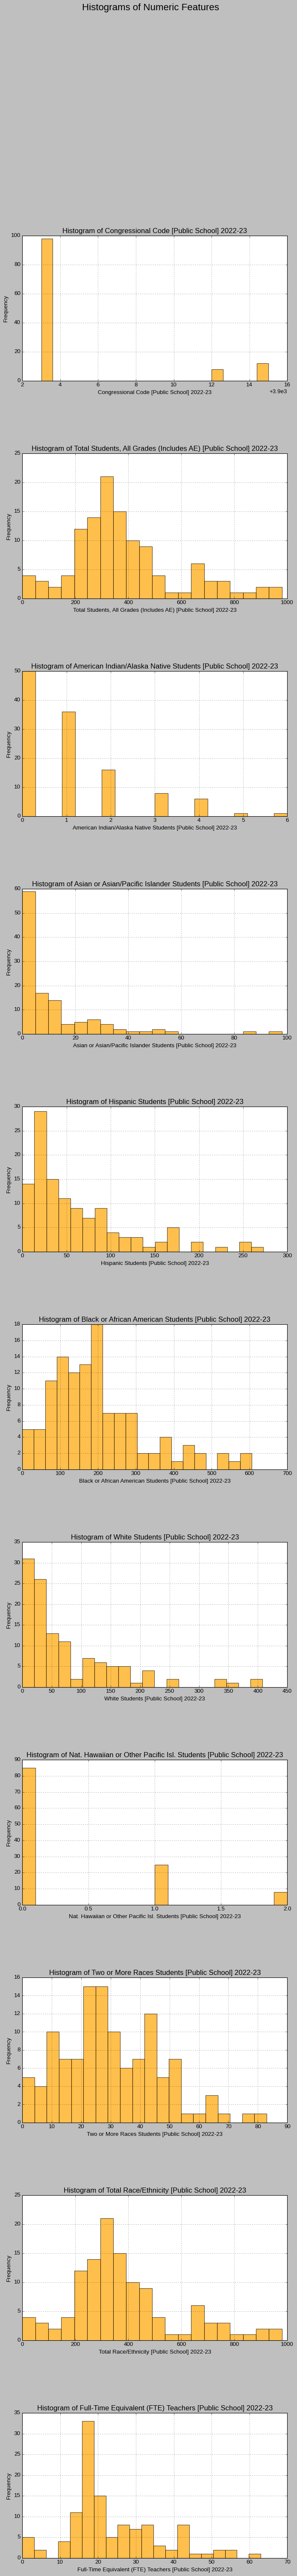

In [20]:
fig, axes = plt.subplots(nrows=len(num_cols2), ncols=1, figsize=(10, 5*num_numeric_cols))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

for i, col in enumerate(num_cols2):
    axes[i].hist(CCSD_Schools[col].dropna(), bins=20, color='orange', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Histogram of {col}', fontsize=15)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].grid(True)

# Set a main title for all subplots
fig.suptitle('Histograms of Numeric Features', fontsize=20)
plt.style.use('seaborn-whitegrid')
plt.draw()
plt.show()

## Demographic Exploratory Data Analysis

In [21]:
school_poverty = pd.read_excel('/content/drive/MyDrive/Columbus City Schools/Take 2/NCES Dataset/Neighborhood Poverty Data Cleaned .xlsx')

In [22]:
CCSD_Schools.rename(columns={"School ID - NCES Assigned [Public School] Latest available year": "NCESSCH"}, inplace=True)

In [23]:
school_poverty['NCESSCH'] = school_poverty['NCESSCH'].astype(float)
CCSD_Schools['NCESSCH'] = CCSD_Schools['NCESSCH'].astype(float)


In [24]:
import pandas as pd
final_df = pd.merge(CCSD_Schools, school_poverty, on='NCESSCH')

In [25]:
# Convert 'Highest Grade Offered' to numerical representation
grade_mapping = {
    'Prekindergarten': -1,  # Or another suitable numerical representation
    'Kindergarten': 0,
    '1st Grade': 1,
    '2nd Grade': 2,
    '3rd Grade': 3,
    '4th Grade': 4,
    '5th Grade': 5,
    '6th Grade': 6,
    '7th Grade': 7,
    '8th Grade': 8,
    '9th Grade': 9,
    '10th Grade': 10,
    '11th Grade': 11,
    '12th Grade': 12
}

# Apply the mapping to the column in both DataFrames
CCSD_Schools['Highest Grade Offered [Public School] 2022-23'] = CCSD_Schools['Highest Grade Offered [Public School] 2022-23'].map(grade_mapping)
final_df['Highest Grade Offered [Public School] 2022-23'] = final_df['Highest Grade Offered [Public School] 2022-23'].map(grade_mapping)

# Now you can safely convert to float if needed
final_df['Highest Grade Offered [Public School] 2022-23'] = final_df['Highest Grade Offered [Public School] 2022-23'].astype(float)

In [26]:
# Convert 'Lowest Grade Offered' to numerical representation
grade_mapping = {
    'Prekindergarten': -1,  # Or another suitable numerical representation
    'Kindergarten': 0,
    '1st Grade': 1,
    '2nd Grade': 2,
    '3rd Grade': 3,
    '4th Grade': 4,
    '5th Grade': 5,
    '6th Grade': 6,
    '7th Grade': 7,
    '8th Grade': 8,
    '9th Grade': 9,
    '10th Grade': 10,
    '11th Grade': 11,
    '12th Grade': 12
}

# Apply the mapping to the column in both DataFrames
CCSD_Schools['Lowest Grade Offered [Public School] 2022-23'] = CCSD_Schools['Lowest Grade Offered [Public School] 2022-23'].map(grade_mapping)
final_df['Lowest Grade Offered [Public School] 2022-23'] = final_df['Lowest Grade Offered [Public School] 2022-23'].map(grade_mapping)

# Now you can safely convert to float if needed


In [27]:
CCSD_Schools['Lowest Grade Offered [Public School] 2022-23'] = CCSD_Schools['Lowest Grade Offered [Public School] 2022-23'].astype(float)

In [28]:
CCSD_Schools['Pupil/Teacher Ratio [Public School] 2022-23'] = pd.to_numeric(CCSD_Schools['Pupil/Teacher Ratio [Public School] 2022-23'], errors='coerce')

In [29]:
import pandas as pd

# Load your data (example file paths)
print("School Poverty Data:")
print(school_poverty.head())

print("\nCCSD Schools Data:")
print(CCSD_Schools.head())

# Perform the join
merged = pd.merge(school_poverty, CCSD_Schools, on='NCESSCH', how='inner')
final_df['Pupil/Teacher Ratio [Public School] 2022-23'] = pd.to_numeric(final_df['Pupil/Teacher Ratio [Public School] 2022-23'], errors='coerce')


# Display the first few rows of the joined dataframe
print("\nJoined Data:")
print(merged.head())

# Display column names
print("\nColumns in Joined Data:")
print(merged.columns)

# Display summary information of the dataframe
print("\nInformation about Joined Data:")
print(merged.info())

# Check for missing values
print("\nMissing Values in Joined Data:")
print(merged.isnull().sum())


School Poverty Data:
        NCESSCH                               NAME  IPR_EST  IPR_SE
0  1.000050e+10          Albertville Middle School      259    87.0
1  1.000050e+10            Albertville High School      261    92.0
2  1.000050e+10    Albertville Intermediate School      139    61.0
3  1.000050e+10      Albertville Elementary School      227   110.0
4  1.000050e+10  Albertville Kindergarten and PreK      373   124.0

CCSD Schools Data:
                        School Name School Name [Public School] 2022-23  \
0          ALPINE ELEMENTARY SCHOOL            Alpine Elementary School   
1  ARTS IMPACT MIDDLE SCHOOL (AIMS)    Arts Impact Middle School (Aims)   
2          AVALON ELEMENTARY SCHOOL            Avalon Elementary School   
3        AVONDALE ELEMENTARY SCHOOL          Avondale Elementary School   
4     BEATTY PARK ELEMENTARY SCHOOL       Beatty Park Elementary School   

        NCESSCH Agency Name [Public School] 2022-23  \
0  3.904380e+11      Columbus City Schools Di

In [30]:
# Function to remove duplicate columns based on their content
def remove_duplicate_columns(df):
    seen_columns = {}
    keep_columns = []

    for col in df.columns:
        col_data = tuple(df[col])
        if col_data not in seen_columns:
            seen_columns[col_data] = col
            keep_columns.append(col)

    return df[keep_columns]

# Remove duplicate columns
cleaned_df = remove_duplicate_columns(merged)

# Drop rows with any missing values
final_df = cleaned_df.dropna()

# Display the first few rows of the final dataframe
print(final_df.tail())

          NCESSCH                                               NAME  IPR_EST  \
108  3.904380e+11         Columbus North International School (7-12)      157   
109  3.904380e+11         Columbus City Preparatory School for Girls      270   
110  3.904380e+11                             Northgate Intermediate      252   
111  3.904380e+11  Linden Park Neighborhood Early Childhood Educa...      124   
114  3.904380e+11   Columbus Africentric Early College Middle School      118   

     IPR_SE                                        School Name  \
108    60.0         COLUMBUS NORTH INTERNATIONAL SCHOOL (7-12)   
109   102.0         COLUMBUS CITY PREPARATORY SCHOOL FOR GIRLS   
110    78.0                             NORTHGATE INTERMEDIATE   
111    30.0  LINDEN PARK NEIGHBORHOOD EARLY CHILDHOOD EDUCA...   
114    72.0   COLUMBUS AFRICENTRIC EARLY COLLEGE MIDDLE SCHOOL   

                   School Name [Public School] 2022-23  \
108         Columbus North International School (7-12)   


## **Plotting the Demographics**

1. Exploratory Data Analysis of neighborhood income-to-poverty ratios, the number of students receiving free and reduced lunch, the median household income of the homes zoned to each current CCSD school, the racial makeup of each Columbus City Schools as compared to the racial makeup of surrounding neighborhoods and school districts, the expenditure per pupil, the teacher and students chronic absentee rates, the unemployment rate of the neighborhood zoned to each school, and
2.   Priority Data to Gather: Community Listening Report Information, Miss Wanda air quality data, CURRENT BUILDING CAPACITY INFORMATION, CURRENT RENOVATION OR DEMOLITION PLANS




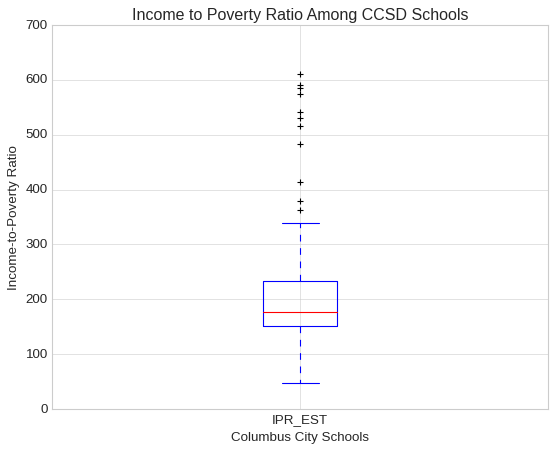

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
CCSD_Demographics = pd.DataFrame(final_df)

# Create a line plot
CCSD_Demographics.plot(x='School Name', y='IPR_EST', kind='box')
plt.title('Income to Poverty Ratio Among CCSD Schools')
plt.xlabel('Columbus City Schools')
plt.ylabel('Income-to-Poverty Ratio')
plt.show()

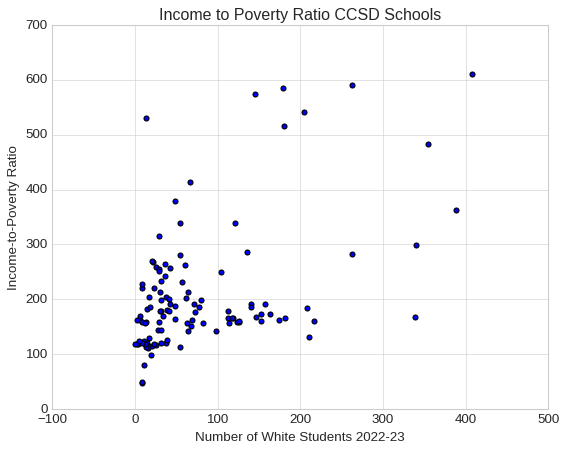

In [32]:
# Sample DataFrame
CCSD_Demographics = pd.DataFrame(final_df)

# Create a line plot
CCSD_Demographics.plot(x='White Students [Public School] 2022-23', y='IPR_EST', kind='scatter')
plt.title('Income to Poverty Ratio CCSD Schools')
plt.xlabel('Number of White Students 2022-23')
plt.ylabel('Income-to-Poverty Ratio')
plt.show()

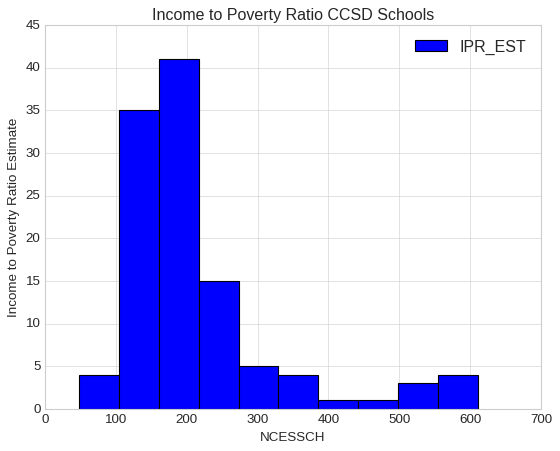

In [33]:
# Create a line plot
CCSD_Demographics.plot(y ='IPR_EST', x ='NCESSCH', kind='hist')
plt.title('Income to Poverty Ratio CCSD Schools')
plt.xlabel('NCESSCH')
plt.ylabel('Income to Poverty Ratio Estimate')
plt.show()

# **Maps**

In [34]:
import folium
import geopandas as gpd
import pandas as pd

# Load the GeoJSON file
geojson_url = '/content/drive/MyDrive/Columbus City Schools/Take 2/Corporate_Boundary.geojson'
geojson = gpd.read_file(geojson_url)


In [35]:
lat = final_df['Latitude [Public School] 2022-23']
lon = final_df['Longitude [Public School] 2022-23']
IPR_EST = final_df['IPR_EST']
Student_Teacher_Ratio = final_df['Pupil/Teacher Ratio [Public School] 2022-23']
school = final_df['School Name [Public School] 2022-23']
school_id = final_df['NCESSCH']

In [36]:
merged.head()

,NCESSCH,NAME,IPR_EST,IPR_SE,School Name,School Name [Public School] 2022-23,Agency Name [Public School] 2022-23,Agency ID - NCES Assigned [Public School] Latest available year,County Name [Public School] 2022-23,County Number [Public School] 2022-23,...,American Indian/Alaska Native Students [Public School] 2022-23,Asian or Asian/Pacific Islander Students [Public School] 2022-23,Hispanic Students [Public School] 2022-23,Black or African American Students [Public School] 2022-23,White Students [Public School] 2022-23,Nat. Hawaiian or Other Pacific Isl. Students [Public School] 2022-23,Two or More Races Students [Public School] 2022-23,Total Race/Ethnicity [Public School] 2022-23,Full-Time Equivalent (FTE) Teachers [Public School] 2022-23,Pupil/Teacher Ratio [Public School] 2022-23
0,3.904380e+11,Fort Hayes Career Center,157,113.0,FORT HAYES CAREER CENTER,Fort Hayes Career Center,Columbus City Schools District,3904380.0,Franklin County,39049.0,...,0.0,2.0,14.0,35.0,63.0,0.0,3.0,117.0,29.0,4.03
1,3.904380e+11,Columbus Spanish Immersion K-7 School,144,54.0,COLUMBUS SPANISH IMMERSION K-7 SCHOOL,Columbus Spanish Immersion K-7 School,Columbus City Schools District,3904380.0,Franklin County,39049.0,...,4.0,0.0,246.0,151.0,28.0,2.0,25.0,456.0,25.0,18.24
2,3.904380e+11,Valleyview Elementary School,192,66.0,VALLEYVIEW ELEMENTARY SCHOOL,Valleyview Elementary School,Columbus City Schools District,3904380.0,Franklin County,39049.0,...,3.0,12.0,80.0,92.0,72.0,1.0,26.0,286.0,17.0,16.82
3,3.904380e+11,Alpine Elementary School,262,64.0,ALPINE ELEMENTARY SCHOOL,Alpine Elementary School,Columbus City Schools District,3904380.0,Franklin County,39049.0,...,0.0,9.0,28.0,179.0,60.0,2.0,29.0,307.0,17.0,18.06
4,3.904380e+11,Avalon Elementary School,258,57.0,AVALON ELEMENTARY SCHOOL,Avalon Elementary School,Columbus City Schools District,3904380.0,Franklin County,39049.0,...,1.0,28.0,92.0,208.0,26.0,0.0,20.0,375.0,20.0,18.75


In [37]:
plot_dataframe = pd.DataFrame({'Latitude': lat, 'Longitude': lon, 'IPR_EST': IPR_EST, 'Student_Teacher_Ratio': Student_Teacher_Ratio, 'School': school, 'School_ID': school_id})

In [38]:
plot_dataframe.head()

,Latitude,Longitude,IPR_EST,Student_Teacher_Ratio,School,School_ID
0,39.9746,-82.9875,157,4.03,Fort Hayes Career Center,3.904380e+11
1,40.0475,-82.9752,144,18.24,Columbus Spanish Immersion K-7 School,3.904380e+11
2,39.9621,-83.0822,192,16.82,Valleyview Elementary School,3.904380e+11
3,40.0944,-82.9740,262,18.06,Alpine Elementary School,3.904380e+11
4,40.0761,-82.9553,258,18.75,Avalon Elementary School,3.904380e+11


In [39]:
import folium
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
m = folium.Map(location=[38,-82], zoom_start=10, control_scale=True)
m
outfp = "base_map.html"
m.save(outfp)

In [41]:
# Read the data
points = gpd.read_file('/content/drive/MyDrive/Columbus City Schools/Map Data CCSD/Columbus_City_Council_Districts.zip')
points.head()

,OBJECTID,SHORTNAME,DISTRICT,TOTAL,TARGET_DEV,TOTAL18,TOTALHISP_,TOTALNH_P,WHITENH_P,BLACKNH_P,AIANNH_P,ASIANNH_P,HPINH_P,OTHERNH_P,MLTMNNH_P,LAST_EDIT_,SHAPESTAre,SHAPESTLen,geometry
0,110,District 1,1,100997,358,77126,8.30,91.70,58.32,18.46,1.03,11.61,0.08,1.47,0.73,2021-12-13,5.713805e+08,378218.165283,"POLYGON ((-9238610.064 4888685.127, -9238554.0..."
1,111,District 2,2,100572,-67,79775,7.65,92.35,68.64,9.77,1.05,11.33,0.05,1.00,0.51,2021-12-13,7.965823e+08,627186.419374,"POLYGON ((-9249702.048 4880043.245, -9249278.9..."
2,112,District 3,3,100914,275,91031,4.49,95.51,77.01,6.56,0.80,9.50,0.11,0.99,0.55,2021-12-13,4.543078e+08,230606.488823,"POLYGON ((-9243701.845 4865410.702, -9243701.8..."
3,113,District 4,4,100288,-351,74770,9.79,90.21,33.68,46.94,0.96,6.24,0.06,1.12,1.22,2021-12-13,5.084346e+08,242961.480302,"POLYGON ((-9238798.412 4878682.690, -9238776.5..."
4,114,District 5,5,100505,-134,76338,5.79,94.21,42.50,41.20,0.86,7.64,0.03,1.09,0.89,2021-12-13,7.123678e+08,554155.462806,"POLYGON ((-9224046.131 4882771.880, -9224077.9..."


In [42]:
# Convert points to GeoJSON
points_gjson = folium.features.GeoJson(points, name="Columbus City Schools")


In [43]:
# Check the GeoJSON features
#points_gjson.data.get('features')

In [44]:
# Create a Map instance
m = folium.Map(location=[38, -82], tiles = 'cartodbpositron', zoom_start=11, control_scale=True)

# Add points to the map instance
points_gjson.add_to(m)

# Alternative syntax for adding points to the map instance
#m.add_child(points_gjson)

#Show map
#m

In [45]:
# Create a layer control object and add it to our map instance
folium.LayerControl().add_to(m)
from numpy import *
exp(-2*pi)
#Show map
m

import webbrowser  # open file in webbrowser

m = folium.Map(location=[40.0675717,-83.0180459], zoom_start=10)

marker = folium.Marker(location=[40.0675717,-83.0180459],
                       tooltip= "plot_dataframe",
                       popup='Columbus City School District').add_to(m)

m


In [46]:
import pandas as pd

df = pd.DataFrame(plot_dataframe)


m = folium.Map([40.0675717,-83.0180459], zoom_start=10)

html = df.to_html(
    classes="table table-striped table-hover table-condensed table-responsive"
)

popup = folium.Popup(html)

folium.Marker([40.0675717,-83.0180459], popup=popup).add_to(m)

m


In [47]:
m = folium.Map(
    tiles=folium.TileLayer(no_wrap=True)
)
radius = 50
folium.CircleMarker(
    location=[40.0675717,-83.0180459],
    radius=radius,
    color="cornflowerblue",
    stroke=False,
    fill=True,
    fill_opacity=0.8,
    opacity=1,
    popup="{} pixels".format(radius),
    tooltip="I am in pixels",
).add_to(m)
m

In [48]:
import ast
import pandas as pd

data = pd.read_excel('/content/drive/MyDrive/Columbus City Schools/Take 2/NCES Dataset/CCSD Data Cleaned .xlsx')

data.describe()

,School ID - NCES Assigned [Public School] Latest available year,Agency ID - NCES Assigned [Public School] Latest available year,County Number [Public School] 2022-23,ANSI/FIPS State Code [Public School] Latest available year,Latitude [Public School] 2022-23,Longitude [Public School] 2022-23,Congressional Code [Public School] 2022-23,"Total Students, All Grades (Includes AE) [Public School] 2022-23",American Indian/Alaska Native Students [Public School] 2022-23,Asian or Asian/Pacific Islander Students [Public School] 2022-23,Hispanic Students [Public School] 2022-23,Black or African American Students [Public School] 2022-23,White Students [Public School] 2022-23,Nat. Hawaiian or Other Pacific Isl. Students [Public School] 2022-23,Two or More Races Students [Public School] 2022-23,Total Race/Ethnicity [Public School] 2022-23,Full-Time Equivalent (FTE) Teachers [Public School] 2022-23
count,1.180000e+02,118.0,118.0,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,3.904380e+11,3904380.0,39049.0,39.0,39.987641,-82.976457,3904.830508,384.211864,1.076271,11.262712,62.983051,199.898305,78.440678,0.347458,30.203390,384.211864,23.620339
std,2.029397e+03,0.0,0.0,0.0,0.053509,0.060864,4.114401,204.236073,1.282071,16.767606,59.317483,130.291612,87.170973,0.604500,16.805859,204.236073,12.379446
min,3.904380e+11,3904380.0,39049.0,39.0,39.884262,-83.107100,3903.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.904380e+11,3904380.0,39049.0,39.0,39.943624,-83.007736,3903.000000,266.250000,0.000000,1.000000,21.000000,109.250000,18.250000,0.000000,19.000000,266.250000,16.000000
50%,3.904380e+11,3904380.0,39049.0,39.0,39.975050,-82.975864,3903.000000,333.000000,1.000000,4.500000,44.000000,180.000000,41.000000,0.000000,27.000000,333.000000,19.000000
75%,3.904380e+11,3904380.0,39049.0,39.0,40.033634,-82.949450,3903.000000,455.000000,2.000000,12.750000,87.000000,250.250000,118.500000,1.000000,42.000000,455.000000,30.750000
max,3.904380e+11,3904380.0,39049.0,39.0,40.104500,-82.836200,3915.000000,980.000000,6.000000,98.000000,273.000000,606.000000,408.000000,2.000000,83.000000,980.000000,63.000000


In [49]:
import pandas as pd

import io

import matplotlib.pyplot as plt


CCSD Map Envelope

In [50]:
def create_envelope_polygon(
    map_object, list_of_points, layer_name, line_color, fill_color, weight, text
):

    # Since it is pointless to draw a box around less than 2 points check len of input
    if len(list_of_points) < 2:
        return

    # Find the edges of box
    from operator import itemgetter

    list_of_points = sorted(list_of_points, key=itemgetter(0))
    x_min = list_of_points[0]
    x_max = list_of_points[len(list_of_points) - 1]

    list_of_points = sorted(list_of_points, key=itemgetter(1))
    y_min = list_of_points[0]
    y_max = list_of_points[len(list_of_points) - 1]

    upper_left = (x_min[0], y_max[1])
    upper_right = (x_max[0], y_max[1])
    lower_right = (x_max[0], y_min[1])
    lower_left = (x_min[0], y_min[1])

    edges = [upper_left, upper_right, lower_right, lower_left]

    # Create feature group, add the polygon and add the feature group to the map
    fg = folium.FeatureGroup(name=layer_name)
    fg.add_child(
        folium.vector_layers.Polygon(
            locations=edges,
            color=line_color,
            fill_color=fill_color,
            weight=weight,
            popup=(folium.Popup(text)),
        )
    )
    map_object.add_child(fg)

    return map_object

In [51]:
# Initialize map
my_envelope_map = folium.Map(location=[40.0675676,-83.015471], zoom_start=8)

# Create an envelope polygon that contains some points
list_of_points = random_points(
    amount=10, LON_min=49.1, LON_max=50, LAT_min=8, LAT_max=9
)

create_envelope_polygon(
    my_envelope_map,
    list_of_points,
    layer_name="Example envelope",
    line_color="indianred",
    fill_color="red",
    weight=5,
    text="Example envelope",
)

draw_points(
    my_envelope_map,
    list_of_points,
    layer_name="Example points for envelope",
    line_color="darkred",
    fill_color="darkred",
    text="Example point for envelope",
)

# Add layer control and show map
folium.LayerControl(collapsed=False).add_to(my_envelope_map)
my_envelope_map


NameError: name 'random_points' is not defined